# INTRO

With the most popular housing prices dataset. By DL we are going to predict the price by giving certain values.

# BEFORE TO START

Let's first import the libraries and the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
house = pd.read_csv("kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's check if we have null values. Nope, we do not have.

In [7]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now some statistics measures of the dataset.

In [9]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


With this plot we can see the range of prices. Most of the prices are in the range from 0 to 1 million.

C:\Users\ulise\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


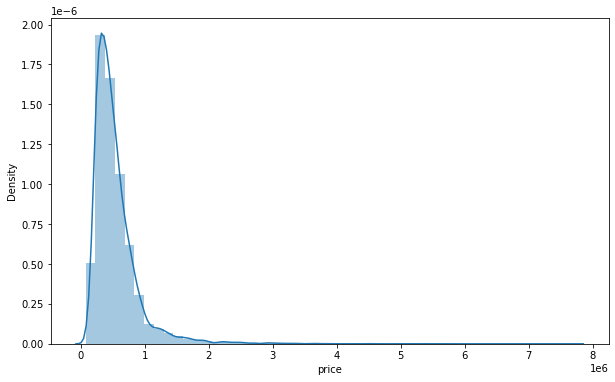

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(house["price"])
plt.show()

Now we are going to count the numbers of bedrooms, most of the houses have three bedrooms.

C:\Users\ulise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

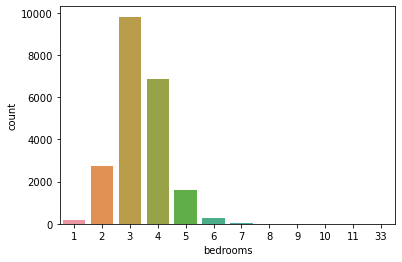

In [15]:
sns.countplot(house["bedrooms"])

Let's find out if we have some correlation. The most strong variable is the size in square feet. Which makes sense because as long as bigger that house is, this one is more expensive.

In [17]:
house.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We draw a plot to see it visually.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

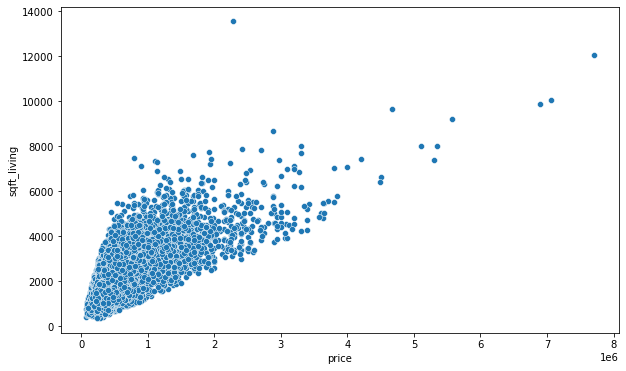

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price", y = "sqft_living", data = house)

Now, with this boxplot, we can see that as long as the houses have more bedrooms, those ones are going to be more expensive. With some outliers.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

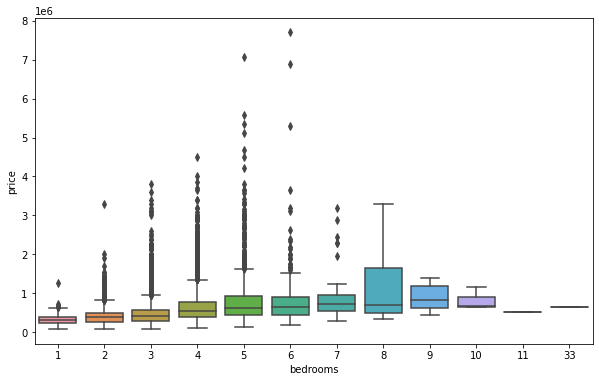

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "bedrooms", y ="price", data = house)

Most expensive houses:

In [23]:
house.sort_values("price", ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


# SOME DATASET CLEANING/TRANSFORMATION

We need to drop the "id" column because it is a numerical variable so the model will take it into consideration. The problem is that this variable is not useful because it is a random number.

In [25]:
house = house.drop("id", axis = 1)

Now the date calumn we need to transform it into a datetime data. And create two extra columns, the year and month.

In [26]:
house["date"] = pd.to_datetime(house["date"])

In [28]:
house["year"] = house["date"].apply(lambda date: date.year)
house["month"] = house["date"].apply(lambda date: date.month)

In [29]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


According to the next two plots. It does not matter the month in terms of purchasing a house.

<AxesSubplot:xlabel='month', ylabel='price'>

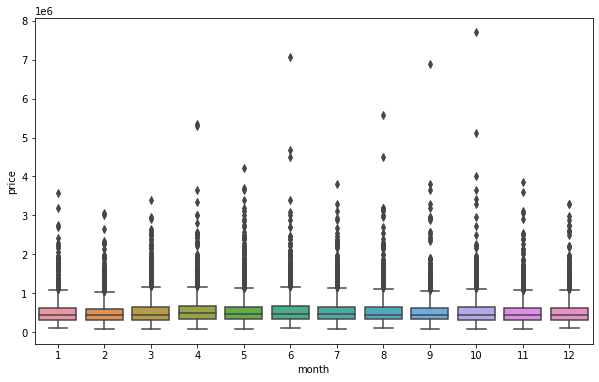

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="month", y="price", data = house)

In [32]:
house.groupby("month").mean()["price"]

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<bound method Axes.bar of <AxesSubplot:xlabel='month'>>

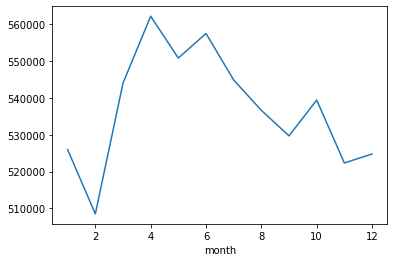

In [36]:
house.groupby("month").mean()["price"].plot()

Let'a continuing deleting useless variables.

In [37]:
house = house.drop("date", axis = 1)

In [39]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [42]:
house=house.drop("zipcode", axis = 1)

In [44]:
house["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [45]:
house["sqft_basement"].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

# START CREATING THE MODEL

We are going to create two variables, the "X" is every column but price and the "y" is the variable that we would like to predict, in this case is the price.

In [47]:
X = house.drop("price", axis=1).values
y = house["price"].values

First, we need to separate the dataset into four datasets. Two datasets are going to use for training the model and the other two for evaluate the performance of the model.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

We are going to use a Scaler. This is basically to standardize the numbers. From a big number, we are going to transform them into a low number without affecting the distance between them. This fuction subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum .

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.fit_transform(X_test)

Then, we are going to built the ANN, first we create the model. We are going to use five hidden layers with 19 neurons for these model and just one output layer. We are going to use the Rectified Linear, which allows it to model complex relationships between inputs and outputs.

At the end, we create the compile of the ANN with the optimizer Adam which is an optimization algorithm that computes adaptive learning rates for each parameter based on the first and second moments of the gradients. Adam is known to be an effective optimizer for a wide range of neural network models.


And in this case, 'mse' is the loss function being used, which stands for Mean Squared Error. The MSE loss function calculates the average of the squared differences between the predicted and actual values of the output. It is commonly used for regression problems where the goal is to minimize the difference between predicted and actual values.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
X_train.shape

(15117, 19)

In [60]:
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# MODEL TRAINING

In this case we going to train the model with the four datasets that we got after splitting into four pieces our main dataset. 

With a batch size of 128, a batch size is a parameter that specifies the number of samples that will be used in each batch during training. Using a smaller batch size can lead to more frequent updates to the weights of the neural network, which can result in faster convergence and better performance. However, using a larger batch size can help to reduce the noise in the gradient estimation and can be more computationally efficient.

And a epoch of 400 what it is the number of times that the entire training dataset will be passed through the neural network during training. One epoch is defined as a complete pass through the training data. Increasing the number of epochs can lead to better performance on the training set, but if the model is overfitting, then it may not generalize well to new data.

In [63]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430194425856.0000 - val_loss: 418598944768.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 418153824256.0000 - val_loss: 371887243264.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 232504049664.0000 - val_loss: 99689701376.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 97713405952.0000 - val_loss: 93462274048.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 94148468736.0000 - val_loss: 91133517824.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 90537771008.0000 - val_loss: 87333797888.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 86696050688.0000 - val_loss: 83211829248.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 82421882880.0000 - val_loss: 79084478464.0000
Epoch 9/400
119/119 [======

Epoch 135/400
119/119 [==============================] - 0s 4ms/step - loss: 30633551872.0000 - val_loss: 31729266688.0000
Epoch 136/400
119/119 [==============================] - 1s 5ms/step - loss: 30605846528.0000 - val_loss: 33658312704.0000
Epoch 137/400
119/119 [==============================] - 1s 4ms/step - loss: 30499979264.0000 - val_loss: 34244962304.0000
Epoch 138/400
119/119 [==============================] - 1s 5ms/step - loss: 30493120512.0000 - val_loss: 33693601792.0000
Epoch 139/400
119/119 [==============================] - 1s 4ms/step - loss: 30491811840.0000 - val_loss: 32733958144.0000
Epoch 140/400
119/119 [==============================] - 1s 5ms/step - loss: 30517010432.0000 - val_loss: 33070479360.0000
Epoch 141/400
119/119 [==============================] - 1s 5ms/step - loss: 30465527808.0000 - val_loss: 32907390976.0000
Epoch 142/400
119/119 [==============================] - 1s 5ms/step - loss: 30495455232.0000 - val_loss: 33850580992.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 28274049024.0000 - val_loss: 34318399488.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 28232273920.0000 - val_loss: 33439717376.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 28286476288.0000 - val_loss: 31237089280.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 28236744704.0000 - val_loss: 34180366336.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 28270176256.0000 - val_loss: 32684517376.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 28245125120.0000 - val_loss: 32317093888.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 28320761856.0000 - val_loss: 33233686528.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 28174680064.0000 - val_loss: 31963465728.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 26914916352.0000 - val_loss: 35215765504.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 26984828928.0000 - val_loss: 33336864768.0000


We get the results of our training.

In [66]:
loss = pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,4.301944e+11,4.185989e+11
1,4.181538e+11,3.718872e+11
2,2.325040e+11,9.968970e+10
3,9.771341e+10,9.346227e+10
4,9.414847e+10,9.113352e+10
...,...,...
395,2.693791e+10,3.153690e+10
396,2.695141e+10,3.365482e+10
397,2.695893e+10,3.384455e+10
398,2.691492e+10,3.521577e+10


We can notice that the error rate goes down. And the lines are continually steady, so we do not overfitting.

<AxesSubplot:>

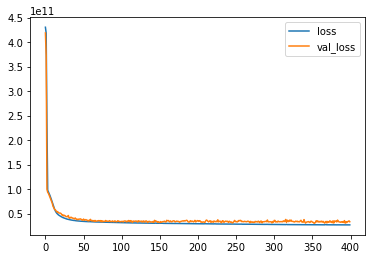

In [67]:
loss.plot()

# PERFORMANCE OF OUR MODEL

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

First let's create the predictions.

In [70]:
pre = model.predict(X_test)

203/203 [==============================] - 0s 941us/step


Now we can get the metrics. The numbers can look a little bit higher, but let's take into consideration that house prices are pretty high, for that reason the differece is a big number. So if we would like to guess the price, the error window is going to be of 180K USD dollars.

In [71]:
mean_squared_error(y_test, pre)

33336865134.66461

In [72]:
np.sqrt(mean_squared_error(y_test, pre))

182583.85781515465

In [73]:
mean_absolute_error(y_test, pre)

110969.27829499422

In [74]:
house["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

We need to introduce another metric, this is the explained_variance_score which is a value between 0 and 1, with higher values indicating better performance. A score of 1 indicates that the model is able to perfectly explain the variance in the target variable, while a score of 0 indicates that the model is not able to explain any of the variance in the target variable. In our case is a positive result.

In [75]:
explained_variance_score(y_test, pre)

0.7893569835232307

Let's see the plot of our model.

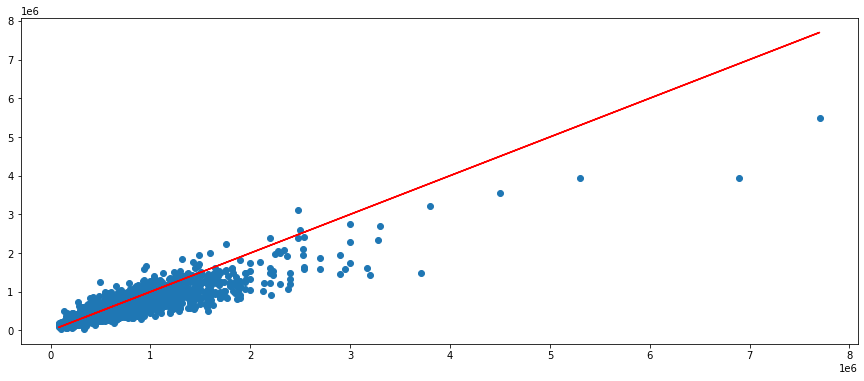

In [79]:
plt.figure(figsize=(15,6))
plt.scatter(y_test, pre)
plt.plot(y_test, y_test, "r")

Now we are going to grab the first house information but the price. We are going to test our model to see if it can predict it.

In [80]:
single_house = house.drop("price", axis=1).iloc[0]

In [81]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

The model predicts the price of the first house at 247532.95 USD dollars, and the real price is 221900.0. With a difference og 26K USD dollars.

In [82]:
model.predict(single_house)

1/1 [==============================] - 0s 20ms/step


array([[247532.95]], dtype=float32)

In [84]:
house.head(1)["price"]

0    221900.0
Name: price, dtype: float64